In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

import logging, sys
logging.disable(sys.maxsize)


D:\d_program_files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\d_program_files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\d_program_files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\d_program_files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

In [2]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt
from glob import glob


# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224, 224]
train_path = 'data/train'
valid_path = 'data/test'

In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 33s 0us/step


In [7]:
for layer in inception.layers:
    layer.trainable = False

In [8]:
folders = glob('data/train/*')

In [9]:
x = Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [13]:
# Cost & Optimization
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
# Impor images 
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
training_set = train_datagen.flow_from_directory(train_path, 
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

test_set = train_datagen.flow_from_directory(valid_path, 
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 236s 4s/step - loss: 2.7346 - acc: 0.6325 - val_loss: 3.1680 - val_acc: 0.5556
Epoch 2/20
61/61 [==============================] - 279s 5s/step - loss: 0.6429 - acc: 0.8380 - val_loss: 3.2356 - val_acc: 0.5000
Epoch 3/20
61/61 [==============================] - 274s 4s/step - loss: 0.5105 - acc: 0.8678 - val_loss: 3.4487 - val_acc: 0.4444
Epoch 4/20
61/61 [==============================] - 276s 5s/step - loss: 0.4922 - acc: 0.8811 - val_loss: 3.7178 - val_acc: 0.6667
Epoch 5/20
61/61 [==============================] - 278s 5s/step - loss: 0.6543 - acc: 0.8631 - val_loss: 4.0007 - val_acc: 0.5556
Epoch 6/20
61/61 [==============================] - 287s 5s/step - loss: 0.4623 - acc: 0.9098 - val_loss: 4.4953 - val_acc: 0.6667
Epoch 7/20
61/61 [==============================] - 280s 5s/step - loss: 0.6105 - acc: 0.8734 - val_loss: 7.4740 - val_acc: 0.5000
Epoch 8/20
61/61 [==============================] - 287s 5s/step - loss: 0.6312 - a

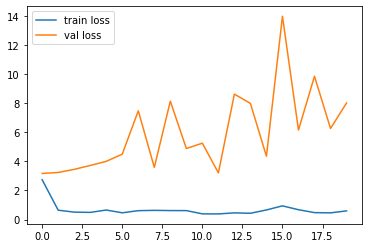

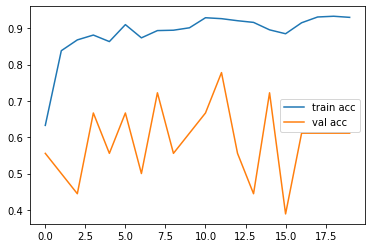

In [17]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss')
plt.show()


plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.savefig('Accval_acc')

In [18]:
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [19]:
y_pred = model.predict(test_set)
y_pred

array([[7.57126846e-30, 1.00000000e+00, 5.12199169e-18, 4.59302429e-10],
       [1.33234368e-10, 3.23575114e-06, 8.79729167e-03, 9.91199553e-01],
       [9.77349437e-23, 5.87979436e-01, 1.04873806e-01, 3.07146728e-01],
       [4.01662193e-23, 9.99541879e-01, 7.38547942e-06, 4.50820371e-04],
       [6.75674840e-22, 1.00000000e+00, 3.39234885e-09, 5.27662110e-08],
       [2.47484435e-15, 1.00000000e+00, 4.34491896e-12, 4.71469426e-11],
       [7.39236714e-35, 9.98761415e-01, 2.94611938e-26, 1.23857963e-03],
       [5.32304682e-24, 7.97731527e-17, 1.00000000e+00, 8.08349047e-13],
       [3.53795836e-15, 6.40407390e-21, 1.00000000e+00, 1.42185531e-16],
       [9.04801286e-30, 1.00000000e+00, 4.43173883e-12, 9.75196311e-17],
       [2.00344697e-24, 1.00000000e+00, 4.05333270e-16, 2.07370060e-17],
       [1.11580246e-25, 9.74722505e-01, 2.52775308e-02, 1.03585012e-12],
       [1.98075237e-11, 1.71686888e-01, 5.06485738e-02, 7.77664602e-01],
       [1.50448071e-10, 1.67690403e-10, 1.72116330e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
np.unique(y_pred)

array([0.00000000e+00, 7.39236714e-35, 2.26040056e-34, 3.80307504e-33,
       2.27029630e-32, 7.57126846e-30, 9.04801286e-30, 2.94611938e-26,
       1.11580246e-25, 2.00344697e-24, 5.32304682e-24, 4.01662193e-23,
       9.77349437e-23, 6.75674840e-22, 6.40407390e-21, 5.12199169e-18,
       2.07370060e-17, 7.97731527e-17, 9.75196311e-17, 1.42185531e-16,
       4.05333270e-16, 2.47484435e-15, 3.53795836e-15, 2.71750413e-14,
       6.79318581e-13, 8.08349047e-13, 1.03585012e-12, 4.34491896e-12,
       4.43173883e-12, 1.98075237e-11, 4.71469426e-11, 1.33234368e-10,
       1.50448071e-10, 1.67690403e-10, 4.59302429e-10, 2.71711831e-09,
       3.39234885e-09, 5.27662110e-08, 7.85206282e-08, 8.36106935e-08,
       1.72116330e-07, 3.23575114e-06, 7.38547942e-06, 1.26933664e-04,
       4.50820371e-04, 1.23857963e-03, 8.79729167e-03, 2.52775308e-02,
       5.06485738e-02, 1.04873806e-01, 1.71686888e-01, 1.78122267e-01,
       3.07146728e-01, 5.87979436e-01, 7.77664602e-01, 8.21877658e-01,
      

In [ ]:
# model = load_model('model_inception.h5')

In [32]:
img = image.load_img('data/val/diseased cotton leaf/dis_leaf (93)_iaip.jpg', target_size=(224, 224))
# img = image.load_img('data/val/fresh cotton leaf/d (7)_iaip.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
# img_data=preprocess_input(x)
# img_data.shape
model.predict(x)
a=np.argmax(model.predict(img_data), axis=1)
a

array([3], dtype=int64)

In [33]:
img = image.load_img('data/val/diseased cotton leaf/dis_leaf (285)_iaip.jpg', target_size=(224, 224))
img = image.load_img('data/val/fresh cotton leaf/d (8)_iaip.jpg', target_size=(224, 224))
# img = image.load_img('data/test/diseased cotton leaf/dis_leaf (124).jpg', target_size=(224, 224))
x = image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
# img_data=preprocess_input(x)
# img_data.shape
d = model.predict(x)
a=np.argmax(d, axis=1)
a

array([2], dtype=int64)

In [27]:
d

array([[6.12754468e-03, 1.11907676e-01, 4.11669389e-05, 8.81923556e-01]],
      dtype=float32)